In [17]:
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from collections import Counter

Data using downloaded files

In [18]:
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')
df = pd.DataFrame(arff_file_year_5[0])
df

for i in range(len(df)):
    if df.loc[i, 'class'] == b'0':
        df.loc[i, 'class'] = 0.0
    else:
        df.loc[i, 'class'] = 1.0

#cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
#df_sub = df.loc[:, cols]
#lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3
##
###lim = np.logical_and(df_sub < df_sub.quantile(0.99, numeric_only=False),
###                     df_sub > df_sub.quantile(0.01, numeric_only=False))
##
#df.loc[:, cols] = df_sub.where(lim, np.nan)
data = df.dropna()
data
#df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.520,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0.0
4,0.048179,0.55041,0.107650,1.24370,-22.959,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0.0
6,0.099486,0.59991,0.374890,1.65290,19.036,0.210840,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0.0
7,0.078518,0.20546,0.103930,2.79390,77.784,0.365150,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0.0
8,0.125040,0.35440,0.314190,2.71270,17.942,0.305750,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,0.016964,0.75503,0.081574,1.12680,-197.070,0.002708,0.016964,0.32445,0.8879,0.24497,...,0.202530,0.069249,0.96847,0.028093,8.9614,4.8148,264.490,1.3800,3.22850,1.0
5874,0.118540,0.51946,0.376420,1.96150,-80.058,0.000000,0.118540,0.92506,1.1781,0.48054,...,0.126960,0.246670,0.88039,0.259280,1.9625,7.1645,121.300,3.0090,5.08030,1.0
5892,0.112350,1.73990,-0.514250,0.43445,-82.297,-0.322010,0.112350,-0.42524,3.4144,-0.73987,...,-0.020766,-0.151850,0.96072,-1.122600,12.9690,32.4040,97.205,3.7549,5.64380,1.0
5893,-0.089739,1.33000,-0.314680,0.67454,-124.530,-1.260700,-0.089739,-0.24799,2.2327,-0.32981,...,0.220300,0.272090,0.79435,-0.428730,4.9425,15.4680,158.060,2.3092,6.41950,1.0


Standardizing Data

In [19]:
#data = df.dropna()
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()

attribute_names = [
    "X1",
    "X2",
    "X3",
    "X4",
    "X5",
    "X6",
    "X7",
    "X8",
    "X9",
    "X10",
    "X11",
    "X12",
    "X13",
    "X14",
    "X15",
    "X16",
    "X17",
    "X18",
    "X19",
    "X20",
    "X21",
    "X22",
    "X23",
    "X24",
    "X25",
    "X26",
    "X27",
    "X28",
    "X29",
    "X30",
    "X31",
    "X32",
    "X33",
    "X34",
    "X35",
    "X36",
    "X37",
    "X38",
    "X39",
    "X40",
    "X41",
    "X42",
    "X43",
    "X44",
    "X45",
    "X46",
    "X47",
    "X48",
    "X49",
    "X50",
    "X51",
    "X52",
    "X53",
    "X54",
    "X55",
    "X56",
    "X57",
    "X58",
    "X59",
    "X60",
    "X61",
    "X62",
    "X63",
    "X64",
    "class"
]

attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]

attribute_dict[attribute_names[len(attribute_names)-1]] = pd.cut(data['class'],2,labels=[0,1])

standardisedData = pd.DataFrame(attribute_dict)
#standardisedData


Normalize Data

In [20]:
data
normalizer = preprocessing.Normalizer()
data_normalised = normalizer.fit_transform(data)
data_normalised_transposed = data_normalised.transpose()

normalised_dict = {}

for i in range(len(data_normalised_transposed)):
    normalised_dict[attribute_names[i]] = data_normalised_transposed[i]

normalised_dict[attribute_names[len(attribute_names)-1]] = pd.cut(data['class'],2,labels=[0,1])

normalisedData = pd.DataFrame(normalised_dict)
#normalisedData

Normalised and Standardised data

In [21]:

normalizer = preprocessing.Normalizer()
data_normalised_standardised = normalizer.fit_transform(standardisedData)
data_normalised_standardised_transposed = data_normalised_standardised.transpose()

normalised_standardised_dict = {}

for i in range(len(data_normalised_standardised_transposed)):
    normalised_standardised_dict[attribute_names[i]] = data_normalised_standardised_transposed[i]

normalised_standardised_dict[attribute_names[len(attribute_names)-1]] = pd.cut(data['class'],2,labels=[0,1])

normalised_StandardisedData = pd.DataFrame(normalised_standardised_dict)
normalised_StandardisedData

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,class
0,0.002238,0.006806,-0.184402,-0.059651,-0.008993,0.005133,0.007890,-0.146190,-0.071207,-0.012482,...,0.016031,0.018925,-0.021236,-0.020586,-0.020313,-0.056556,0.087178,-0.201183,-0.020237,0
4,-0.006011,0.006421,-0.062143,-0.046003,0.000491,-0.005917,0.005914,-0.105774,0.031954,-0.005296,...,0.311129,-0.003428,-0.123480,-0.012040,-0.018364,-0.063513,0.001996,-0.138234,-0.019268,0
6,0.007277,0.013802,0.426104,-0.039573,0.015265,0.001301,0.013278,-0.209016,-0.108965,-0.012874,...,0.048350,0.024248,-0.042149,-0.026661,-0.033463,-0.139173,0.090552,-0.291199,0.128313,0
7,0.000189,-0.008041,-0.067990,0.036964,0.022233,0.005828,0.007237,0.360046,-0.035659,0.013135,...,0.219087,-0.004598,-0.096928,-0.009559,-0.018131,-0.077601,-0.120463,0.083864,-0.029880,0
8,0.014342,-0.002527,0.278454,0.047273,0.013534,0.005658,0.013835,0.067135,-0.050356,0.007447,...,0.325326,0.011505,-0.143426,-0.007117,-0.030898,-0.060845,-0.153769,0.052904,-0.034354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,-0.012399,0.014921,-0.093834,-0.052261,-0.036366,-0.005837,0.004456,-0.180012,-0.116542,-0.016092,...,0.241186,-0.008344,0.013647,-0.018478,-0.018926,-0.053808,0.361493,-0.272053,-0.019753,1
5874,0.009277,0.005702,0.292401,-0.008794,-0.012856,-0.006567,0.008839,-0.099333,-0.053004,-0.004068,...,0.111913,0.016237,-0.052571,-0.005688,-0.024623,-0.024283,0.039713,-0.183828,-0.014776,1
5892,0.004622,0.036319,-0.531348,-0.057944,-0.007855,-0.010537,0.005050,-0.190614,0.313617,-0.044276,...,-0.112736,-0.024076,0.005385,-0.055267,-0.011095,0.208802,-0.012355,-0.076249,-0.007401,1
5893,-0.026631,0.030191,-0.447073,-0.059372,-0.016353,-0.035898,0.000592,-0.207191,0.157210,-0.036119,...,0.213398,0.013963,-0.083335,-0.034913,-0.016199,0.070713,0.092957,-0.164582,-0.006756,1


Data discretization

In [22]:
atttributes = normalised_StandardisedData.columns.values.tolist()

est = preprocessing.KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='quantile', subsample=None)
est.fit(normalised_StandardisedData)
PreprocessedData_tranformed = est.transform(normalised_StandardisedData).transpose()

for i in range(len(PreprocessedData_tranformed)):
    attribute_dict[atttributes[i]] = PreprocessedData_tranformed[i]
    
attribute_dict[attribute_names[len(attribute_names)-1]] = pd.cut(data['class'],2,labels=[0,1])

discretizedData = pd.DataFrame(attribute_dict)
    
discretizedData

c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 64 are removed. Consider decreasing the number of bins.
  warnings.warn(


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,class
0,8.0,6.0,3.0,4.0,2.0,11.0,6.0,4.0,5.0,4.0,...,7.0,9.0,4.0,2.0,6.0,4.0,9.0,3.0,6.0,0
4,6.0,6.0,4.0,5.0,4.0,5.0,4.0,6.0,8.0,6.0,...,11.0,6.0,0.0,5.0,7.0,3.0,8.0,4.0,6.0,0
6,9.0,8.0,11.0,5.0,9.0,10.0,10.0,2.0,3.0,3.0,...,8.0,10.0,3.0,1.0,1.0,0.0,9.0,0.0,11.0,0
7,8.0,0.0,4.0,10.0,10.0,11.0,6.0,11.0,7.0,11.0,...,10.0,5.0,1.0,6.0,7.0,2.0,3.0,9.0,3.0,0
8,10.0,2.0,10.0,10.0,9.0,11.0,10.0,9.0,6.0,10.0,...,11.0,8.0,0.0,6.0,2.0,3.0,1.0,8.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,4.0,9.0,4.0,4.0,0.0,5.0,3.0,3.0,3.0,3.0,...,10.0,5.0,7.0,3.0,6.0,4.0,11.0,1.0,6.0,1
5874,9.0,5.0,10.0,8.0,1.0,5.0,7.0,6.0,6.0,6.0,...,9.0,9.0,2.0,7.0,4.0,7.0,8.0,3.0,7.0,1
5892,9.0,11.0,0.0,4.0,2.0,1.0,4.0,3.0,11.0,0.0,...,3.0,2.0,6.0,0.0,9.0,11.0,7.0,6.0,9.0,1
5893,1.0,11.0,0.0,4.0,1.0,0.0,1.0,2.0,10.0,0.0,...,10.0,9.0,1.0,0.0,7.0,10.0,9.0,4.0,9.0,1


Visulizing Data and discretization

c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. C

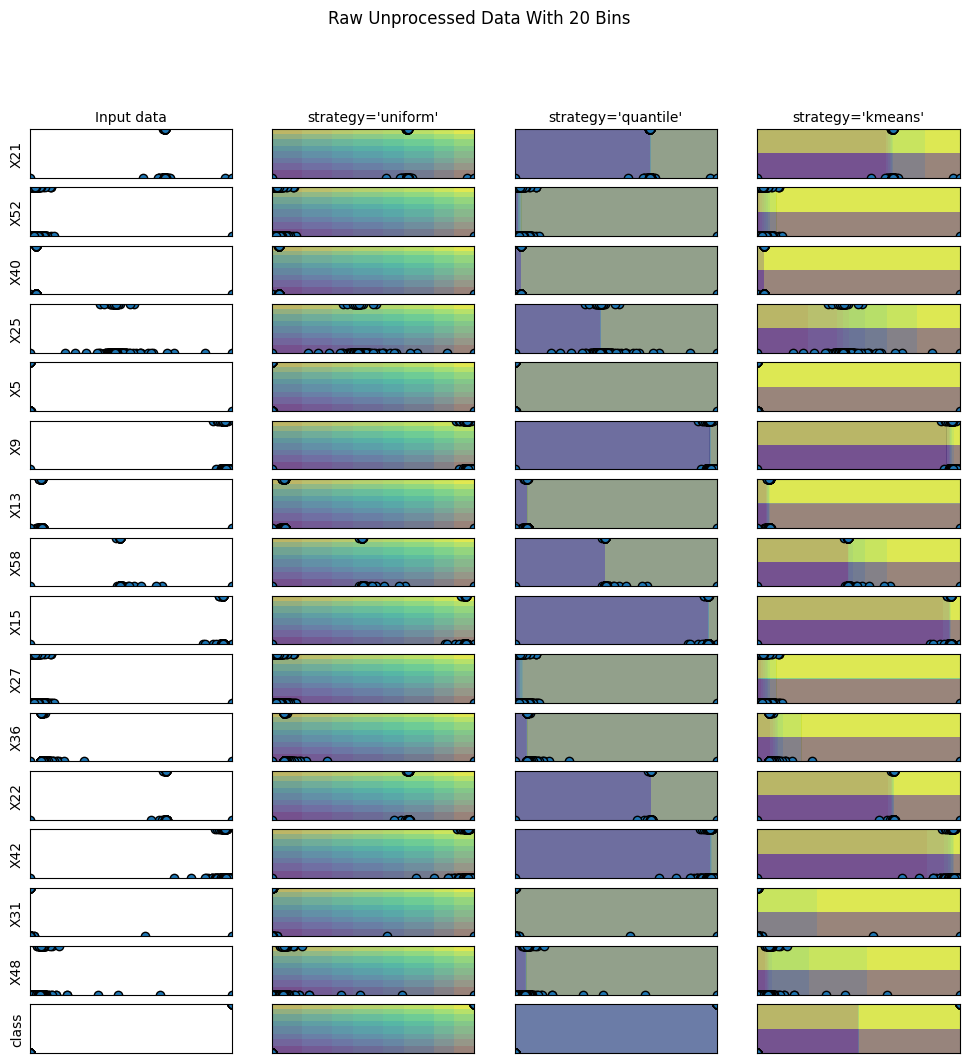

,X5,X9,X13,X15,X21,X22,X25,X27,X31,X36,X40,X42,X48,X52,X58,class
0,-0.008993,-0.071207,-0.005674,-0.013025,-0.006185,0.059309,-0.009921,-0.008280,0.015349,-0.047712,-0.037802,0.013193,0.076070,-0.005827,-0.021236,0
4,0.000491,0.031954,-0.005818,0.000349,-0.006378,-0.001865,0.005459,-0.007550,0.006861,-0.031833,-0.043665,0.003065,0.024094,-0.006804,-0.123480,0
6,0.015265,-0.108965,-0.009137,-0.016790,-0.009447,0.092665,0.002323,-0.013173,0.024111,-0.017214,-0.082388,0.017098,0.141819,-0.010526,-0.042149,0
7,0.022233,-0.035659,-0.004353,-0.023641,-0.006513,0.005096,0.057205,-0.007565,0.049352,-0.278770,-0.047086,0.031722,0.043437,-0.011595,-0.096928,0
8,0.013534,-0.050356,-0.007424,-0.034655,-0.008523,0.152939,0.052476,-0.011177,0.042057,-0.175974,-0.012935,0.039341,0.175567,-0.016075,-0.143426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,-0.036366,-0.116542,-0.006104,0.198031,-0.005969,0.002236,-0.024054,-0.007774,0.006492,-0.168145,0.026889,0.010115,-0.008667,0.005639,0.013647,1
5874,-0.012856,-0.053004,-0.005845,-0.017433,-0.008869,0.069155,-0.014688,-0.006415,0.026579,-0.114380,-0.055941,0.019289,0.082894,-0.007623,-0.052571,1
5892,-0.007855,0.313617,-0.003772,0.007151,-0.003722,0.041643,-0.054139,-0.004116,0.004832,0.282614,-0.031290,0.001637,0.020398,-0.006195,0.005385,1
5893,-0.016353,0.157210,-0.005104,-0.086277,-0.004991,-0.104734,-0.179340,-0.010447,-0.007457,0.107206,-0.034845,-0.009833,-0.056543,-0.004718,-0.083335,1


In [52]:

strategies = ["uniform", "quantile", "kmeans"]

# financial rations from paper that performed emperical analysis on useful ratios
keeping_attributes = ["X23","X1","X7","X49","X9","X3","X2","X59","X6","X4", "X51", "X8", "class"]
keeping_attributes_raw_names = ['Attr1', 'Attr2', 'Attr3','Attr4','Attr5','Attr6','Attr7','Attr8','Attr9','Attr10','Attr21','class']

# financial ratios that were most common in the Tree Ensemble from other paper
most_common_attributes_4years = ['X21','X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48','class']
most_common_attributes_4years_raw = ['Attr21','Attr52', 'Attr40', 'Attr25', 'Attr5', 'Attr9', 'Attr13', 'Attr58', 'Attr15', 'Attr27', 'Attr36', 'Attr22', 'Attr42', 'Attr31', 'Attr48','class']
most_common_attributes_raw = ['Attr21','Attr52', 'Attr40', 'Attr25', 'Attr5', 'Attr9', 'Attr13', 'Attr58', 'Attr15', 'Attr27', 'Attr36', 'Attr22', 'Attr42', 'Attr31', 'Attr48', 'Attr32', 'Attr57', 'Attr12', 'Attr35', 'Attr6', 'Attr53', 'Attr16', 'Attr11', 'Attr55', 'Attr14', 'Attr29', 'Attr41','class']
most_common_attributes = ['X21','X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48', 'X32', 'X57', 'X12', 'X35', 'X6', 'X53', 'X16', 'X11', 'X55', 'X14', 'X29', 'X41','class']

for attribute in data.columns.values.tolist():
    if attribute not in most_common_attributes_4years_raw:
        del data[attribute]


figure = plt.figure(figsize=(12,12))
figure.suptitle("Raw Unprocessed Data With 20 Bins")
i = 1


for ds_cnt, col in enumerate(data.columns.values.tolist()):
    ax = plt.subplot(len(data.columns.values.tolist()), len(strategies) + 1, i)
    ax.scatter(data[col], data['class'], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=10)

    xx, yy = np.meshgrid(
        np.linspace(data[col].min(), data[col].max(), 300),
        np.linspace(data['class'].min(), data['class'].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    ax.set_xticks(())
    ax.set_yticks(())
   

    ax.set_ylabel(most_common_attributes_4years[ds_cnt])

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = preprocessing.KBinsDiscretizer(
            n_bins=20, encode="ordinal", strategy=strategy, subsample=200_000
        )
        
        enc.fit(np.transpose(np.array([data[col],data['class']])))
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(data.columns.values.tolist()), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)

        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(data[col], data['class'], edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=10)

        i += 1

plt.show()
figure.savefig("RawUnprocessed_20bins.pdf",format='pdf')
normalised_StandardisedData

Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \







In [90]:

keeping_attributes = ["X23","X1","X7","X49","X9","X3","X2","X59","X6","X4", "X51", "X8", "class"]

most_common_attributes = ['X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48', 'X32', 'X57', 'X12', 'X35', 'X6', 'X53', 'X16', 'X11', 'X55', 'X14', 'X29', 'X41','class']

#for attribute in discretizedData.columns.values.tolist():
#    if attribute not in most_common_attributes:
#        del discretizedData[attribute]

#discretizedData

Split Data into training and testing

In [91]:
processed_bankrupt = discretizedData.loc[discretizedData["class"] == 1]
processed_nonbunkrupt = discretizedData.loc[discretizedData["class"] == 0]

processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
#training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])
#testing_data


Featue Selection from Zięba, M., Tomczak, S.K. and Tomczak, J.M., 2016. Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction. Expert systems with applications, 58, pp.93-101.

In [38]:
# the most popular features in the Ensemble Boosted Trees model for each year

year1 = ['X16', 'X52', 'X32', 'X28', 'X5', 'X40', 'X9', 'X11', 'X59', 'X23', 'X25', 'X55', 'X17', 'X14', 'X29', 'X13', 'X58', 'X30', 'X57', 'X56']

year2 = ['X40', 'X15', 'X27', 'X5', 'X25', 'X36', 'X22', 'X42', 'X31', 'X13', 'X12', 'X35', 'X9', 'X58', 'X11', 'X48', 'X52', 'X57', 'X55', 'X6']

year3 = ['X15', 'X22', 'X52', 'X27', 'X40', 'X5', 'X25', 'X31', 'X12', 'X42', 'X13', 'X53', 'X57', 'X37', 'X48', 'X6', 'X35', 'X41', 'X32', 'X36']

year4 = ['X22', 'X52', 'X15', 'X25', 'X27', 'X40', 'X58', 'X42', 'X13', 'X36', 'X31', 'X5', 'X53', 'X6', 'X35', 'X48', 'X9', 'X24', 'X38', 'X29']

year5 = ['X25', 'X22', 'X27', 'X15', 'X52', 'X53', 'X14', 'X40', 'X42', 'X36', 'X54', 'X12', 'X58', 'X41', 'X44', 'X48', 'X9', 'X31', 'X32', 'X16']


# I used chaGPT to write the folowing menial code :


# Combine all the lists into one list
all_years = year1 + year2 + year3 + year4 + year5

# Count the occurrences of each element
element_counts = Counter(all_years)
#print(all_years)
# Filter out the elements that appear in at least three lists
most_common = [(element, count) for element, count in element_counts.items() if count >= 4]

# Sort the remaining elements by their frequency
most_common_sorted = sorted(most_common, key=lambda x: x[1], reverse=True)

only_elements = []
#print("Most common elements appearing in at least three lists:")
for element, count in most_common_sorted:
    only_elements.append(element)
    #print(f"{element}: {count} occurrences")
    
print(only_elements)

['X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48']
